In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt; plt.rcParams["figure.dpi"] = 144
import seaborn as sns
from matplotlib import ticker
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spacedecay/space_decay.csv


In [2]:
df = pd.read_csv('../input/spacedecay/space_decay.csv')

<h1>Step 1: Understanding the Data</h1>

In [3]:
df.shape
df.head()

,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,EPOCH,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,EPHEMERIS_TYPE,CLASSIFICATION_TYPE,NORAD_CAT_ID,ELEMENT_SET_NO,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2
0,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T06:46:11,18 SPCS,ARIANE 42P+ DEB,1992-072J,EARTH,TEME,UTC,SGP4,2021-10-31T22:46:50.340864,2.921700,0.652893,7.7156,90.2410,243.1216,38.7796,0,U,26741,999,23588,0.024341,8.830000e-06,0.0,20668.618,492.864,27784.871,796.095,DEBRIS,MEDIUM,FR,1992.0,FRGUI,NaN,3195178,188614016,0 ARIANE 42P+ DEB,1 26741U 92072J 21304.94919376 .00000883 0...,2 26741 7.7156 90.2410 6528926 243.1216 38...
1,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,SL-8 DEB,1979-028C,EARTH,TEME,UTC,SGP4,2021-10-31T16:32:17.360448,13.754973,0.003072,82.9193,299.1120,158.9093,201.3337,0,U,26743,999,50124,0.000066,7.900000e-07,0.0,7358.038,104.689,1002.507,957.299,DEBRIS,SMALL,CIS,1979.0,PKMTR,NaN,3194950,188593285,0 SL-8 DEB,1 26743U 79028C 21304.68908982 .00000079 0...,2 26743 82.9193 299.1120 0030720 158.9093 201...
2,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T06:26:11,18 SPCS,GSAT 1,2001-015A,EARTH,TEME,UTC,SGP4,2021-11-01T05:22:43.421952,1.038224,0.023739,12.1717,16.5368,250.1248,146.2900,0,U,26745,999,7798,0.000000,-1.650000e-06,0.0,41197.852,1386.984,35797.696,33841.738,PAYLOAD,LARGE,IND,2001.0,SRI,NaN,3195026,188609573,0 GSAT 1,1 26745U 01015A 21305.22411368 -.00000165 0...,2 26745 12.1717 16.5368 0237386 250.1248 146...
3,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31T18:07:15,18 SPCS,CZ-4 DEB,1999-057MB,EARTH,TEME,UTC,SGP4,2021-10-31T11:11:24.198720,14.775907,0.006062,98.4781,8.7205,37.3771,323.1632,0,U,26754,999,10204,0.000316,2.265000e-05,0.0,7015.076,97.456,679.465,594.417,DEBRIS,SMALL,PRC,1999.0,TSC,NaN,3194431,188556894,0 CZ-4 DEB,1 26754U 99057MB 21304.46625230 .00002265 0...,2 26754 98.4781 8.7205 0060618 37.3771 323...
4,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,CZ-4 DEB,1999-057MC,EARTH,TEME,UTC,SGP4,2021-10-31T17:46:46.681248,14.724482,0.006226,98.4232,122.0724,345.1605,27.6061,0,U,26755,999,9622,0.000408,2.610000e-05,0.0,7031.400,97.796,697.039,609.491,DEBRIS,SMALL,PRC,1999.0,TSC,NaN,3194950,188592541,0 CZ-4 DEB,1 26755U 99057MC 21304.74081807 .00002610 0...,2 26755 98.4232 122.0724 0062255 345.1605 27...


In [4]:
df.columns

Index(['CCSDS_OMM_VERS', 'COMMENT', 'CREATION_DATE', 'ORIGINATOR',
       'OBJECT_NAME', 'OBJECT_ID', 'CENTER_NAME', 'REF_FRAME', 'TIME_SYSTEM',
       'MEAN_ELEMENT_THEORY', 'EPOCH', 'MEAN_MOTION', 'ECCENTRICITY',
       'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY',
       'EPHEMERIS_TYPE', 'CLASSIFICATION_TYPE', 'NORAD_CAT_ID',
       'ELEMENT_SET_NO', 'REV_AT_EPOCH', 'BSTAR', 'MEAN_MOTION_DOT',
       'MEAN_MOTION_DDOT', 'SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS', 'PERIAPSIS',
       'OBJECT_TYPE', 'RCS_SIZE', 'COUNTRY_CODE', 'LAUNCH_DATE', 'SITE',
       'DECAY_DATE', 'FILE', 'GP_ID', 'TLE_LINE0', 'TLE_LINE1', 'TLE_LINE2'],
      dtype='object')

In [5]:
df.dtypes

CCSDS_OMM_VERS           int64
COMMENT                 object
CREATION_DATE           object
ORIGINATOR              object
OBJECT_NAME             object
OBJECT_ID               object
CENTER_NAME             object
REF_FRAME               object
TIME_SYSTEM             object
MEAN_ELEMENT_THEORY     object
EPOCH                   object
MEAN_MOTION            float64
ECCENTRICITY           float64
INCLINATION            float64
RA_OF_ASC_NODE         float64
ARG_OF_PERICENTER      float64
MEAN_ANOMALY           float64
EPHEMERIS_TYPE           int64
CLASSIFICATION_TYPE     object
NORAD_CAT_ID             int64
ELEMENT_SET_NO           int64
REV_AT_EPOCH             int64
BSTAR                  float64
MEAN_MOTION_DOT        float64
MEAN_MOTION_DDOT       float64
SEMIMAJOR_AXIS         float64
PERIOD                 float64
APOAPSIS               float64
PERIAPSIS              float64
OBJECT_TYPE             object
RCS_SIZE                object
COUNTRY_CODE            object
LAUNCH_D

In [6]:
df.describe()

,CCSDS_OMM_VERS,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,EPHEMERIS_TYPE,NORAD_CAT_ID,ELEMENT_SET_NO,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS,LAUNCH_DATE,DECAY_DATE,FILE,GP_ID
count,14372.0,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.0,14372.000000,14372.0,14372.000000,14372.000000,14372.000000,1.437200e+04,14372.000000,14372.000000,14372.000000,14372.000000,14333.000000,0.0,1.437200e+04,1.437200e+04
mean,2.0,12.463847,0.067168,74.354208,182.353111,165.977199,191.015595,0.0,39558.160381,999.0,32960.199068,-0.000572,0.000049,2.307751e-07,10636.185210,223.521557,5721.060178,2795.040245,2004.507570,NaN,3.194186e+06,1.885638e+08
std,0.0,4.509305,0.181547,29.626780,116.717713,104.461866,109.873807,0.0,7619.846133,0.0,28449.542765,0.032239,0.002391,1.485939e-05,9580.627227,446.517041,13016.299008,7943.045264,13.565227,NaN,3.119117e+03,1.393616e+05
min,2.0,0.051783,0.000005,0.001400,0.020000,0.008200,0.004800,0.0,26741.000000,999.0,0.000000,-0.796460,-0.014873,-4.210300e-05,6542.850000,87.783000,183.393000,73.279000,1961.000000,NaN,3.142499e+06,1.860926e+08
25%,2.0,13.452144,0.000725,53.055300,71.987350,77.363475,90.001600,0.0,33965.750000,999.0,5832.250000,0.000058,0.000001,0.000000e+00,6956.246750,96.232750,599.876000,546.115000,1997.000000,NaN,3.194431e+06,1.885665e+08
50%,2.0,14.277052,0.003416,86.369200,189.460250,150.483900,206.957400,0.0,40165.500000,999.0,28944.500000,0.000272,0.000010,0.000000e+00,7177.549000,100.861000,843.686000,702.433500,2002.000000,NaN,3.194950e+06,1.885986e+08
75%,2.0,14.963745,0.013505,98.565125,292.484750,258.328550,284.163200,0.0,45173.500000,999.0,61422.250000,0.000834,0.000032,0.000000e+00,7468.055000,107.046000,1207.919500,831.959750,2018.000000,NaN,3.195064e+06,1.886107e+08
max,2.0,16.404097,0.897218,144.586200,359.967900,359.989900,359.981900,0.0,270288.000000,999.0,99945.000000,0.595600,0.225321,1.654800e-03,304049.635000,27808.429000,372136.402000,224547.015000,2021.000000,NaN,3.195727e+06,1.886250e+08


In [7]:
df['RCS_SIZE'].unique()

array(['MEDIUM', 'SMALL', 'LARGE', nan], dtype=object)

In [8]:
df['OBJECT_TYPE'].unique()

array(['DEBRIS', 'PAYLOAD', 'ROCKET BODY', 'TBA'], dtype=object)

In [9]:
df['COUNTRY_CODE'].unique()

array(['FR', 'CIS', 'IND', 'PRC', 'US', 'SEAL', 'ITSO', 'SES', 'NICO',
       'ESA', 'JPN', 'EUTE', 'GER', 'PAKI', 'EUME', 'SPN', 'ALG', 'AUS',
       'ARGN', 'SAUD', 'IT', 'CA', 'AC', 'GLOB', 'GREC', 'UAE', 'DEN',
       'NIG', 'UK', 'TURK', 'SKOR', 'CHBZ', 'ISRA', 'USBZ', 'ROC', 'IM',
       'THAI', 'IRAN', 'INDO', 'KAZ', 'AB', 'MALA', 'EGYP', 'COL', 'BRAZ',
       'RASC', 'NOR', 'VTNM', 'NETH', 'ORB', 'VENZ', 'SAFR', 'SWTZ',
       'SWED', 'UKR', 'SING', 'STCT', 'MEX', 'LUXE', 'CHLE', 'BELA',
       'NKOR', 'AZER', 'ASRA', 'ECU', 'EST', 'O3B', 'QAT', 'POL', 'PER',
       'BOL', 'FRIT', 'BEL', 'URY', 'IRAQ', 'TMMC', 'LAOS', 'BERM', 'LTU',
       'FIN', 'CZCH', 'BGR', 'TBD', 'MA', 'AGO', 'BGD', 'RP', 'JOR',
       'ISS', 'SDN', 'RWA', 'SVN', 'NZ', 'PRY', 'TUN', 'HUN', 'MMR',
       'MUS', 'KWT', nan], dtype=object)

In [10]:
orbital_elements_df = df[['ECCENTRICITY','INCLINATION', 
                           'RA_OF_ASC_NODE','ARG_OF_PERICENTER', 
                           'MEAN_ANOMALY','SEMIMAJOR_AXIS', 
                           'APOAPSIS', 'PERIAPSIS']]
orbital_elements_df.describe()

,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,SEMIMAJOR_AXIS,APOAPSIS,PERIAPSIS
count,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000
mean,0.067168,74.354208,182.353111,165.977199,191.015595,10636.185210,5721.060178,2795.040245
std,0.181547,29.626780,116.717713,104.461866,109.873807,9580.627227,13016.299008,7943.045264
min,0.000005,0.001400,0.020000,0.008200,0.004800,6542.850000,183.393000,73.279000
25%,0.000725,53.055300,71.987350,77.363475,90.001600,6956.246750,599.876000,546.115000
50%,0.003416,86.369200,189.460250,150.483900,206.957400,7177.549000,843.686000,702.433500
75%,0.013505,98.565125,292.484750,258.328550,284.163200,7468.055000,1207.919500,831.959750
max,0.897218,144.586200,359.967900,359.989900,359.981900,304049.635000,372136.402000,224547.015000


<h1>Step 2: Data Preperation</h1>

In [11]:
# Decay_Date is always N/A
df = df.drop(labels=['DECAY_DATE'], axis=1)
df = df[[
    #'CCSDS_OMM_VERS', 
    #'COMMENT', 'CREATION_DATE', 
    #'ORIGINATOR',
       'OBJECT_NAME', 'OBJECT_ID', 
    #'CENTER_NAME','REF_FRAME', 'TIME_SYSTEM',
    #'MEAN_ELEMENT_THEORY', 
    #'EPOCH', 
       'MEAN_MOTION', 'ECCENTRICITY',
       'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY',
    #'EPHEMERIS_TYPE', 
    #'CLASSIFICATION_TYPE', 
    #'NORAD_CAT_ID', 'ELEMENT_SET_NO',
       'REV_AT_EPOCH', 'BSTAR', 'MEAN_MOTION_DOT',
    #'MEAN_MOTION_DDOT', 
       'SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS', 'PERIAPSIS',
       'OBJECT_TYPE', 'RCS_SIZE', 
    #'COUNTRY_CODE', 
       'LAUNCH_DATE', 
    #'SITE', 
    #'FILE', 'GP_ID', 
    #'TLE_LINE0', 'TLE_LINE1', 'TLE_LINE2'
]].copy()

In [12]:
df.shape
df.dtypes

OBJECT_NAME           object
OBJECT_ID             object
MEAN_MOTION          float64
ECCENTRICITY         float64
INCLINATION          float64
RA_OF_ASC_NODE       float64
ARG_OF_PERICENTER    float64
MEAN_ANOMALY         float64
REV_AT_EPOCH           int64
BSTAR                float64
MEAN_MOTION_DOT      float64
SEMIMAJOR_AXIS       float64
PERIOD               float64
APOAPSIS             float64
PERIAPSIS            float64
OBJECT_TYPE           object
RCS_SIZE              object
LAUNCH_DATE          float64
dtype: object

In [13]:
#df['LAUNCH_DATE'] = pd.to_numeric(df['LAUNCH_DATE'])
#df['DECAY_DATE'] = pd.to_datetime(df['DECAY_DATE'])
df.dtypes

OBJECT_NAME           object
OBJECT_ID             object
MEAN_MOTION          float64
ECCENTRICITY         float64
INCLINATION          float64
RA_OF_ASC_NODE       float64
ARG_OF_PERICENTER    float64
MEAN_ANOMALY         float64
REV_AT_EPOCH           int64
BSTAR                float64
MEAN_MOTION_DOT      float64
SEMIMAJOR_AXIS       float64
PERIOD               float64
APOAPSIS             float64
PERIAPSIS            float64
OBJECT_TYPE           object
RCS_SIZE              object
LAUNCH_DATE          float64
dtype: object

In [14]:
df

,OBJECT_NAME,OBJECT_ID,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS,OBJECT_TYPE,RCS_SIZE,LAUNCH_DATE
0,ARIANE 42P+ DEB,1992-072J,2.921700,0.652893,7.7156,90.2410,243.1216,38.7796,23588,0.024341,8.830000e-06,20668.618,492.864,27784.871,796.095,DEBRIS,MEDIUM,1992.0
1,SL-8 DEB,1979-028C,13.754973,0.003072,82.9193,299.1120,158.9093,201.3337,50124,0.000066,7.900000e-07,7358.038,104.689,1002.507,957.299,DEBRIS,SMALL,1979.0
2,GSAT 1,2001-015A,1.038224,0.023739,12.1717,16.5368,250.1248,146.2900,7798,0.000000,-1.650000e-06,41197.852,1386.984,35797.696,33841.738,PAYLOAD,LARGE,2001.0
3,CZ-4 DEB,1999-057MB,14.775907,0.006062,98.4781,8.7205,37.3771,323.1632,10204,0.000316,2.265000e-05,7015.076,97.456,679.465,594.417,DEBRIS,SMALL,1999.0
4,CZ-4 DEB,1999-057MC,14.724482,0.006226,98.4232,122.0724,345.1605,27.6061,9622,0.000408,2.610000e-05,7031.400,97.796,697.039,609.491,DEBRIS,SMALL,1999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14367,TBA - TO BE ASSIGNED,NaN,15.465781,0.001190,99.0098,214.6827,219.1613,140.8771,37922,0.006809,3.548080e-03,6804.882,93.109,434.844,418.650,TBA,NaN,NaN
14368,TBA - TO BE ASSIGNED,NaN,14.967557,0.005560,99.0272,141.1159,76.8926,283.8489,32962,0.001777,2.095000e-04,6955.066,96.208,615.599,538.263,TBA,NaN,NaN
14369,TBA - TO BE ASSIGNED,NaN,12.909691,0.056673,31.9916,262.9339,162.7824,199.2858,9113,-0.000175,-6.800000e-07,7675.817,111.544,1732.692,862.672,TBA,NaN,NaN
14370,TBA - TO BE ASSIGNED,NaN,14.245319,0.005822,98.6758,348.3068,187.0288,173.0081,9893,0.000311,6.900000e-06,7188.204,101.086,851.919,768.219,TBA,NaN,NaN


In [15]:
df.isna().sum()

OBJECT_NAME            0
OBJECT_ID             39
MEAN_MOTION            0
ECCENTRICITY           0
INCLINATION            0
RA_OF_ASC_NODE         0
ARG_OF_PERICENTER      0
MEAN_ANOMALY           0
REV_AT_EPOCH           0
BSTAR                  0
MEAN_MOTION_DOT        0
SEMIMAJOR_AXIS         0
PERIOD                 0
APOAPSIS               0
PERIAPSIS              0
OBJECT_TYPE            0
RCS_SIZE             198
LAUNCH_DATE           39
dtype: int64

<h1>Step 3: Feature Understanding</h1>
Plotting Feature Distributions:
    Histogram, KDE, Boxplot

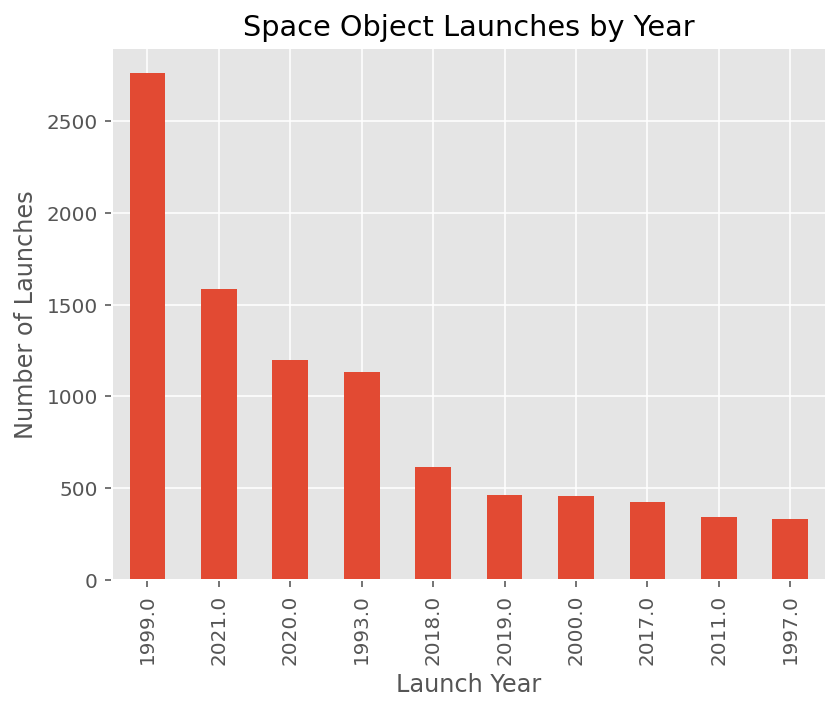

In [16]:
ax = df['LAUNCH_DATE'].value_counts() \
    .head(10) \
    .plot(kind = 'bar', title='Space Object Launches by Year')
ax.set_xlabel('Launch Year')
ax.set_ylabel('Number of Launches')
plt.show()

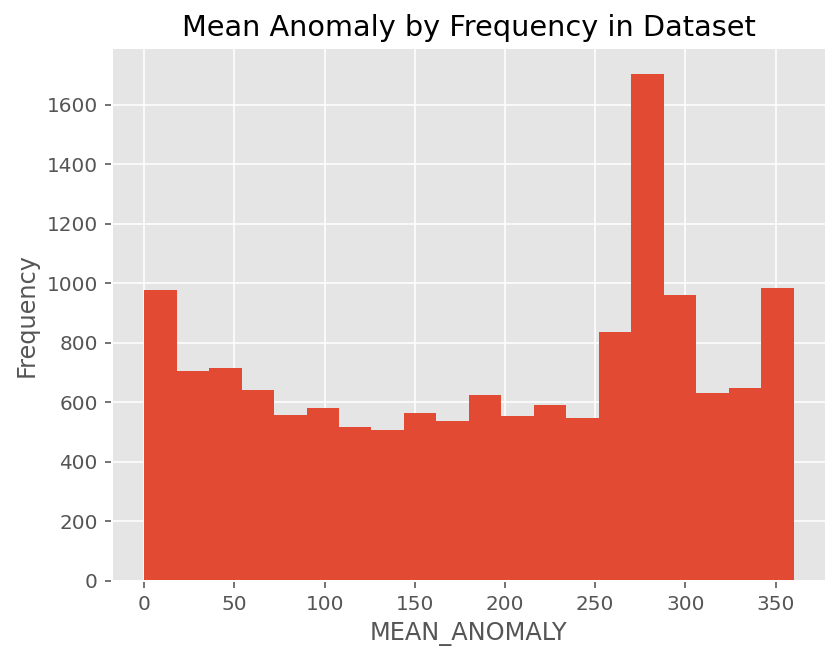

In [17]:
ax = df['MEAN_ANOMALY'].plot(kind='hist', bins=20, title='Mean Anomaly by Frequency in Dataset')
ax.set_xlabel('MEAN_ANOMALY')
plt.show()

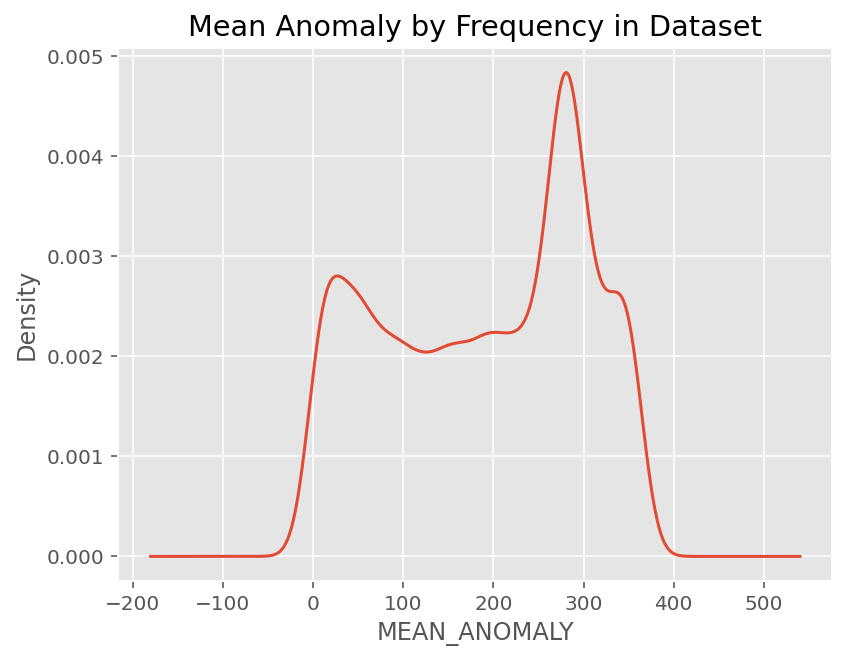

In [18]:
ax = df['MEAN_ANOMALY'].plot(kind='kde', title='Mean Anomaly by Frequency in Dataset')
ax.set_xlabel('MEAN_ANOMALY')
plt.show()

<h1>Step 4: Feature Relationships</h1>

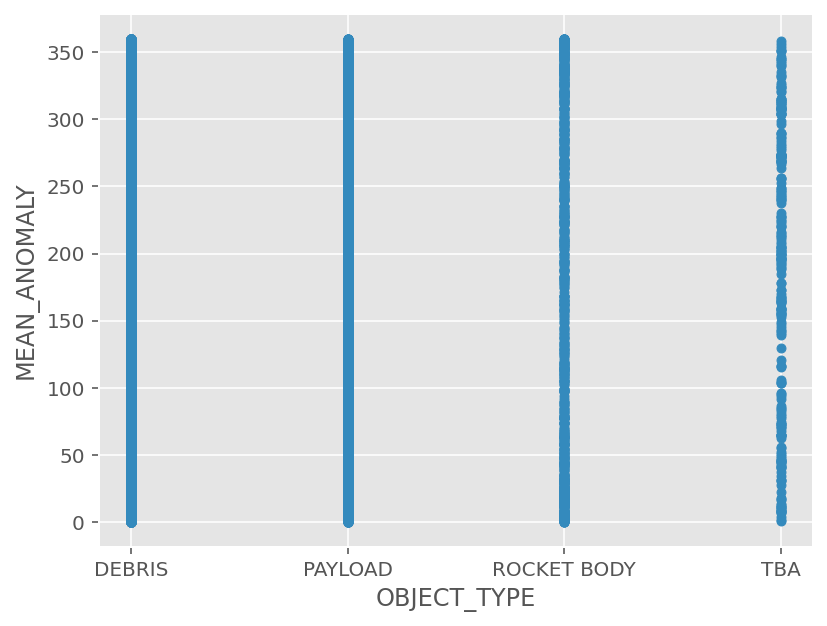

In [19]:
df.plot(kind='scatter', y='MEAN_ANOMALY', x='OBJECT_TYPE')
plt.show()

In [20]:
df.dtypes

OBJECT_NAME           object
OBJECT_ID             object
MEAN_MOTION          float64
ECCENTRICITY         float64
INCLINATION          float64
RA_OF_ASC_NODE       float64
ARG_OF_PERICENTER    float64
MEAN_ANOMALY         float64
REV_AT_EPOCH           int64
BSTAR                float64
MEAN_MOTION_DOT      float64
SEMIMAJOR_AXIS       float64
PERIOD               float64
APOAPSIS             float64
PERIAPSIS            float64
OBJECT_TYPE           object
RCS_SIZE              object
LAUNCH_DATE          float64
dtype: object

<Axes: xlabel='ECCENTRICITY', ylabel='MEAN_ANOMALY'>

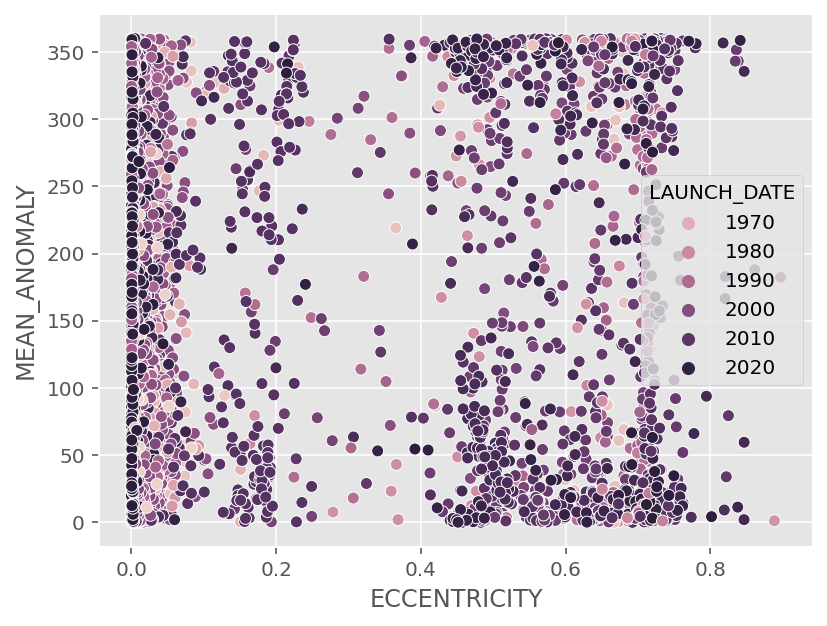

In [21]:
sns.scatterplot(x='ECCENTRICITY', y='MEAN_ANOMALY', hue='LAUNCH_DATE', data=df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

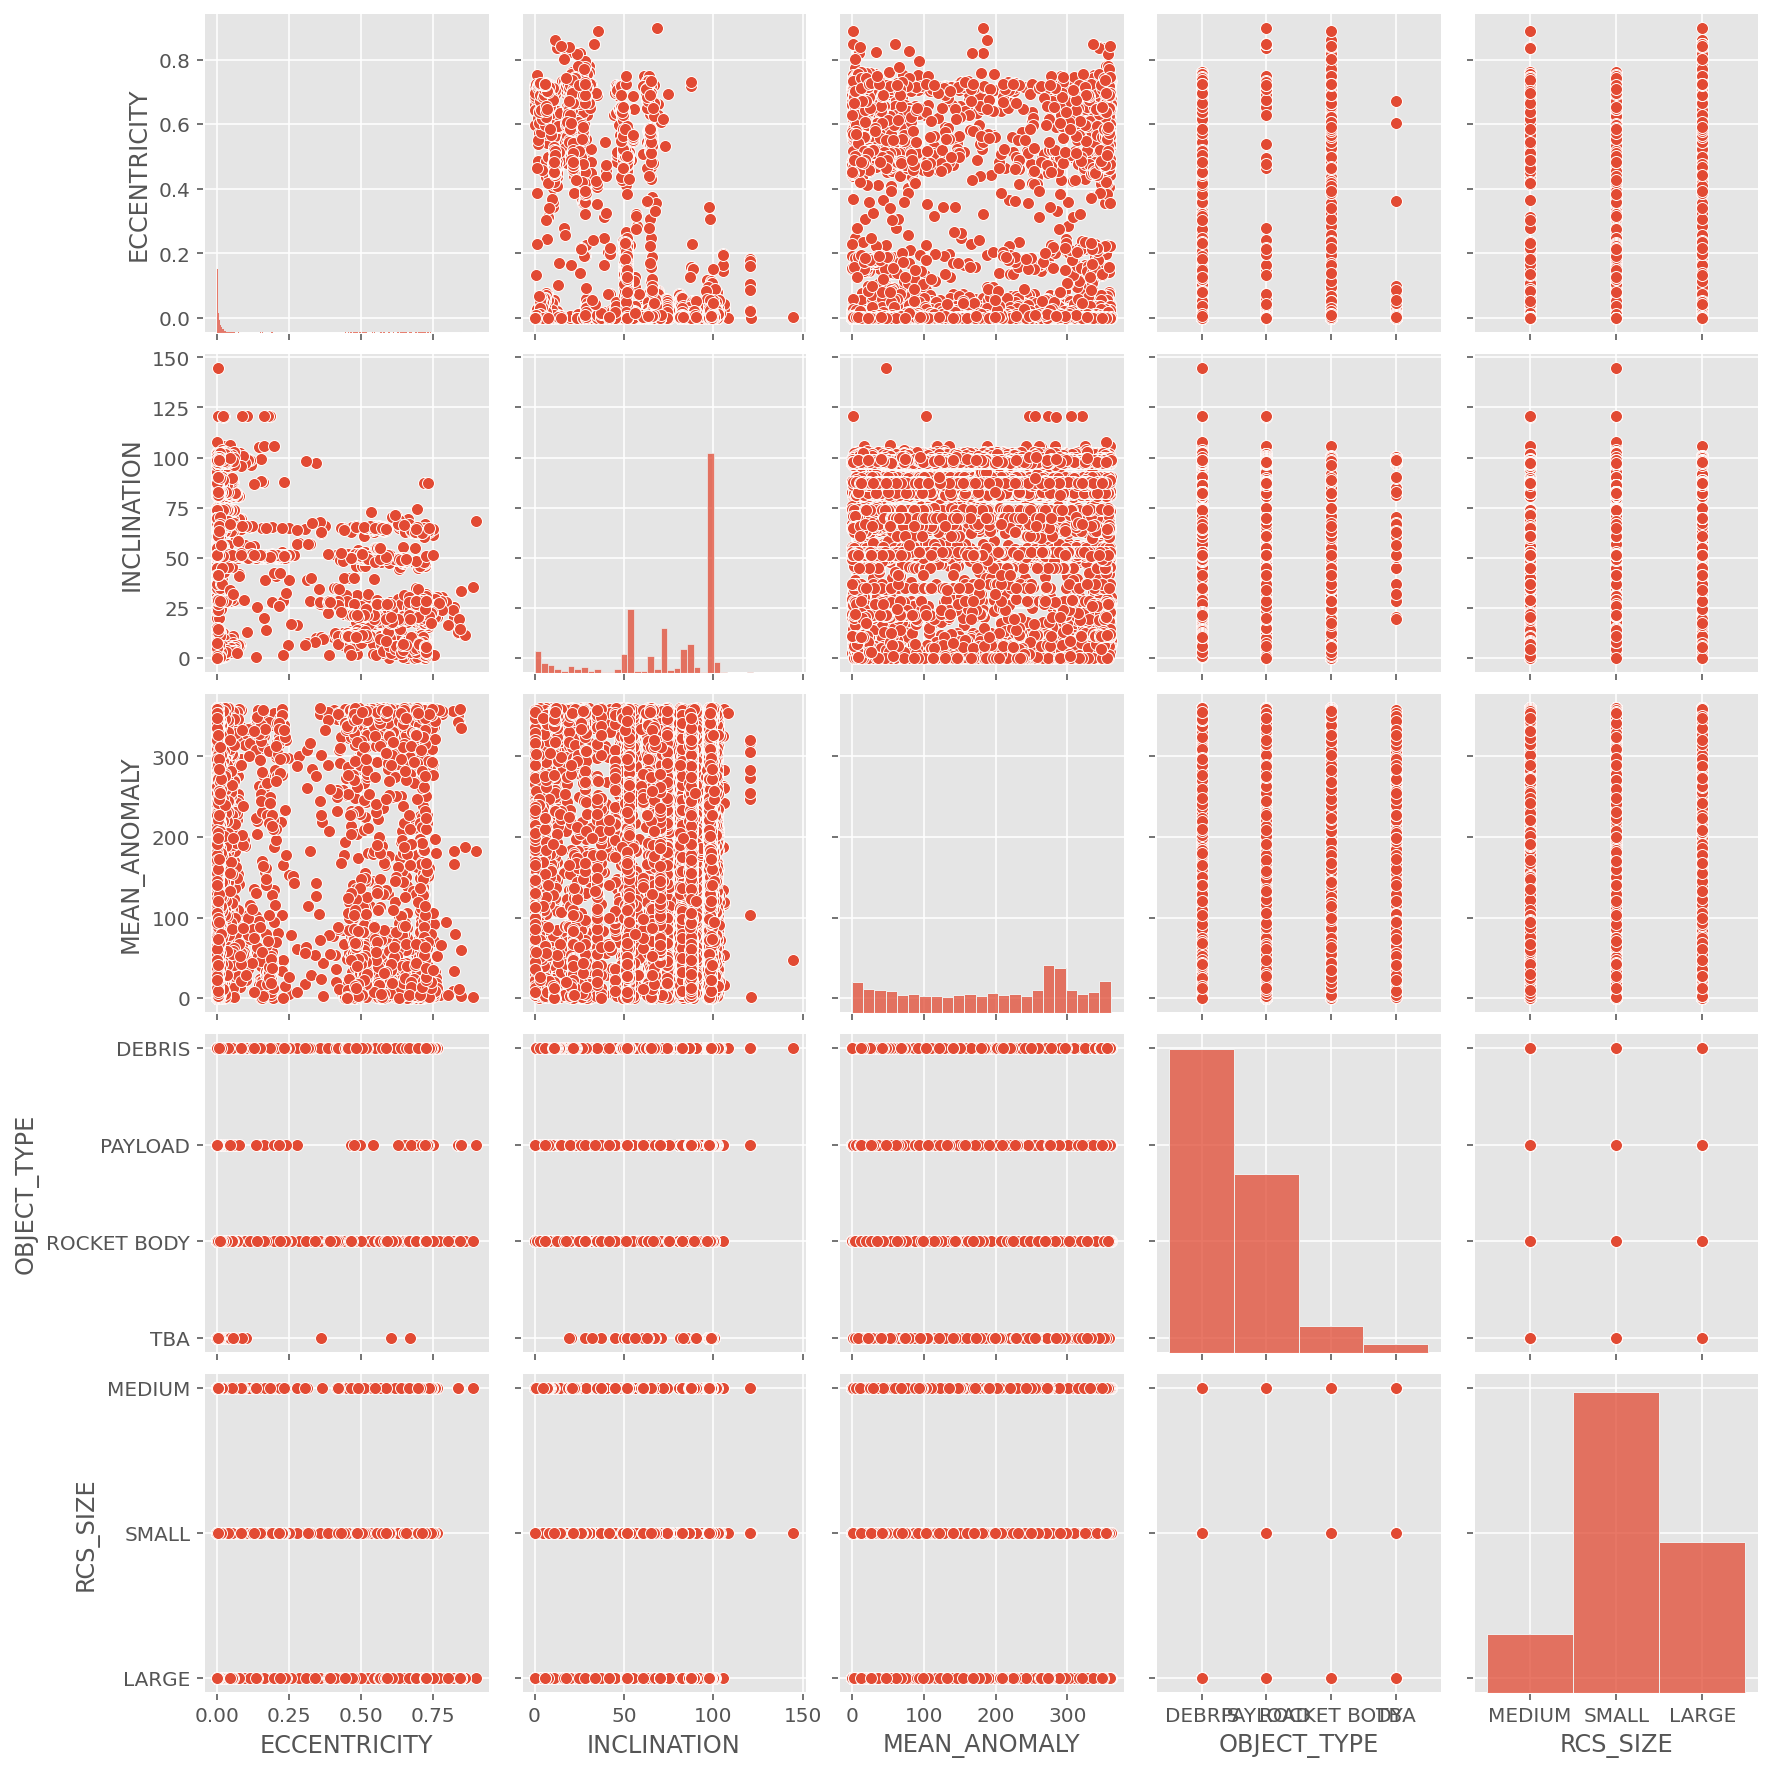

In [22]:
sns.pairplot(df, vars=[ 'ECCENTRICITY',
        'INCLINATION', 'MEAN_ANOMALY', 
        'OBJECT_TYPE', 'RCS_SIZE'], dropna=True)

In [23]:
df_corr = df[[
    #'CCSDS_OMM_VERS', 
    #'COMMENT', 'CREATION_DATE', 
    #'ORIGINATOR',
    #'OBJECT_NAME', 'OBJECT_ID', 
    #'CENTER_NAME','REF_FRAME', 'TIME_SYSTEM',
    #'MEAN_ELEMENT_THEORY', 
    #'EPOCH', 
       'MEAN_MOTION', 'ECCENTRICITY',
       'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY',
    #'EPHEMERIS_TYPE', 
    #'CLASSIFICATION_TYPE', 
    #'NORAD_CAT_ID', 'ELEMENT_SET_NO',
       'REV_AT_EPOCH', 'BSTAR', 'MEAN_MOTION_DOT',
    #'MEAN_MOTION_DDOT', 
       'SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS', 'PERIAPSIS',
    #'OBJECT_TYPE', 'RCS_SIZE', 
    #'COUNTRY_CODE', 
       'LAUNCH_DATE', 
    #'SITE',
    #'DECAY_DATE', 
    #'FILE', 'GP_ID', 
    #'TLE_LINE0', 'TLE_LINE1', 'TLE_LINE2'
]].dropna().corr()

<Axes: >

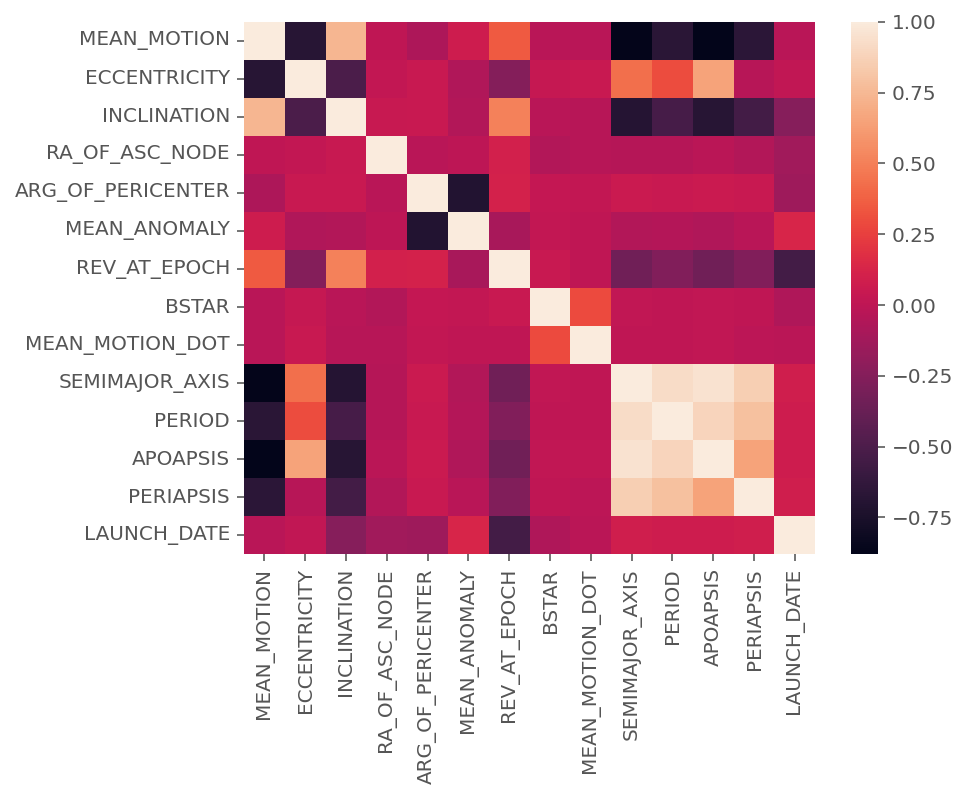

In [24]:
sns.heatmap(df_corr)